In [1]:
#!/usr/bin/python
import numpy as np
import scipy.stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt
import os, math, sys
np.random.seed(88)
os.system('rm *.pdf *.eps *.png');

In [2]:
mu1 = [0,1]
mu2 = [1,0]
cov1 = 0.1*np.identity(2)
cov2 = 0.1*np.identity(2)
def likfunc(X):
    return st.multivariate_normal.pdf(X,mu1,cov1)+ st.multivariate_normal.pdf(X,mu2,cov2)
def priorPdf(X,Ainv):
    return st.multivariate_normal.pdf(X,[0,0],Ainv)
mpl.rcParams.update({'font.size':12})

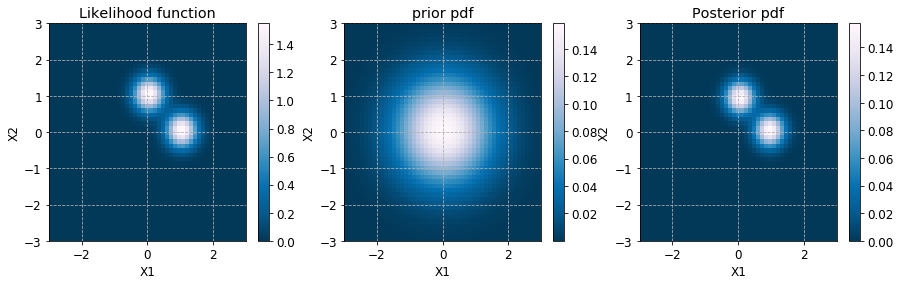

In [6]:
Ngrd = 50
lik = np.zeros((Ngrd,Ngrd))
postr = np.zeros((Ngrd,Ngrd))
prior = np.zeros((Ngrd,Ngrd))
pltAlpha =[0,0]
fac = 3
#X1bnd = [max(-1,-fac*np.sqrt(1/np.power(10.0,pltAlpha[0]))),min(2,fac*np.sqrt(1/np.power(10.0,pltAlpha[0])))]
#X2bnd = [max(-1,-fac*np.sqrt(1/np.power(10.0,pltAlpha[1]))),min(2,fac*np.sqrt(1/np.power(10.0,pltAlpha[1])))]
X1bnd = [-3,3]
X2bnd = [-3,3]
X1g = np.linspace(X1bnd[0],X1bnd[1],Ngrd)
X2g = np.linspace(X2bnd[0],X2bnd[1],Ngrd)
X1grd,X2grd = np.meshgrid(X1g,X2g)
for i in range(0,Ngrd):
    for j in range(0,Ngrd):
        Amatinv = np.diag([1/np.power(10.0,pltAlpha[0]),1/np.power(10.0,pltAlpha[1])])
        lik[i,j] = likfunc([X1grd[i,j],X2grd[i,j]])
        prior[i,j] = priorPdf([X1grd[i,j],X2grd[i,j]],Amatinv)
        postr[i,j] = likfunc([X1grd[i,j],X2grd[i,j]])*priorPdf([X1grd[i,j],X2grd[i,j]],Amatinv)
fig=plt.figure(1,figsize=(15,4))
plt.subplot(1, 3, 1)
plt.pcolor(X1grd,X2grd,lik,cmap='PuBu_r')
plt.colorbar()
plt.grid('on',linestyle='--')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Likelihood function')

plt.subplot(1, 3, 2)
plt.pcolor(X1grd,X2grd,prior,cmap='PuBu_r')
plt.colorbar()
plt.grid('on',linestyle='--')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('prior pdf')

plt.subplot(1, 3, 3)
plt.pcolor(X1grd,X2grd,postr,cmap='PuBu_r')
plt.colorbar()
plt.grid('on',linestyle='--')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Posterior pdf')
plt.savefig('evid2d_1.eps',bbox_inches='tight')